# Os Datasets
<hr>

### Fonte do dataset IMDb: https://www.kaggle.com/datasets/adriankiezun/imdb-dataset-2023

### Sobre o conjunto de dados do IMDb:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Conjunto de dados contendo informações sobre filmes que aparecem no site do IMDB.
Os dados foram obtidos por meio de web scraping em Python e combinados com repositório compartilhado pelo IMDB. Os dados foram pré-processados ​​para incluir apenas filmes lançados depois de 1970 e que atualmente têm mais de 50.000 avaliações. Além disso, foram selecionados apenas os filmes cujos orçamentos e receitas são denominados em dólares americanos para evitar discrepâncias.
O conjunto de dados contém 3.348 observações descritas por 12 atributos.</p>

### Atributos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>id</b> - ID do filme usado pelo repositório IMDB</li>
    <li><b>primaryTitle</b> - título em inglês</li>
    <li><b>originalTitle</b> - título original no idioma nativo</li>
    <li><b>isAdult</b> - orientação parental</li>
    <li><b>runtimeMinutes</b> - tempo total de execução em minutos</li>
    <li><b>genres</b> - gêneros</li>
    <li><b>averageRating</b> - classificação final, com base em todas as classificações</li>
    <li><b>numVotes</b> - número total de votos (classificações)</li>
    <li><b>budget</b> - orçamento total em USD</li>
    <li><b>gross</b> - total bruto mundial em dólares americanos</li>
    <li><b>release_date</b> - data de lançamento, primeira ocorrência</li>
    <li><b>directors</b> - diretores</li>
    ÚLTIMA ATUALIZAÇÃO: 12 de novembro de 2023
</ul>

### Sobre o conjunto de dados do MovieLens 100k:

<hr>

### Fonte do dataset MovieLens: https://www.kaggle.com/datasets/abhikjha/movielens-100k

### Contexto: Recomendado para educação e desenvolvimento
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Conjuntos de dados mais recentes do MovieLens
Esses conjuntos de dados mudarão com o tempo e não são apropriados para relatar resultados de pesquisas. Manteremos os links de download estáveis ​​para downloads automatizados. Não arquivaremos nem disponibilizaremos versões lançadas anteriormente.

Pequeno: 100 mil avaliações e 3.600 aplicações de tags aplicadas a 9 mil filmes por 600 usuários. Última atualização em 9/2018.

Contêm diferentes arquivos CSV para filmes, classificações, links e tags

Datasets usados: movies.csv e ratings.csv
</p>


### Atributos movies.csv:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>movieId</b> - ID do filme do repositório MovieLens 100k</li>
    <li><b>title</b> - título do filme</li>
    <li><b>genres</b> - gêneros</li>
</ul>

### Atributos ratings.csv:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>userId</b> - ID do usuário do repositório MovieLens 100k</li>
    <li><b>rating</b> - notas dos filmes 100k</li>
    <li><b>timestamp</b> - tempo de duração</li>
</ul>

# Importanto o pandas e visualizando os primeiros dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('imdb_data.csv')

In [ ]:
dados.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [ ]:
dados.shape

(3348, 12)

Um ponto interessante a ressaltar é que a mediana, como visto usando o método describe(), temos 50% das notas estão abaixo de 6.8 e 50% estão acima dessa nota.

In [ ]:
dados.describe().round(2)

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross
count,3348.0,3348.00,3348.00,3348.00,3.348000e+03,3.297000e+03
mean,0.0,112.74,6.74,215549.24,5.039280e+07,1.681599e+08
std,0.0,19.93,0.88,248021.06,5.178614e+07,2.366507e+08
min,0.0,63.00,1.00,50004.00,1.800000e+01,2.100000e+02
25%,0.0,98.00,6.20,78977.00,1.500000e+07,3.623022e+07
50%,0.0,109.00,6.80,129040.00,3.200000e+07,8.821516e+07
75%,0.0,124.00,7.30,246849.50,6.800000e+07,2.008117e+08
max,0.0,242.00,9.30,2817283.00,3.560000e+08,2.923706e+09


### Analisando as informações do Dataset

Aqui há um problema, o campo "id" é do tipo "object" deve-se fazer a transformação desse campo para "int64" e como também remover as letras "tt" que estão nos id da base de dados.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


Fazendo a transformação...

In [ ]:
dados['id'] = dados['id'].str.replace('tt', '').astype('int64')

In [ ]:
dados.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,35423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,65421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,65938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,66026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,66206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   int64  
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 314.0+ KB


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Analisando a nota média de todos os filmes do IMDb

In [ ]:
print(f'Média dos filmes do IMDb {dados.averageRating.mean()}')

Média dos filmes do IMDb 6.73853046594982


# Análise Gráfica
Vamos ver agora a distribuição dos dados num histograma.

In [ ]:
import seaborn as sns

Nota-se pelo histogrmama que a frequência das notas começa a subir a partir da nota 4, além de ter uma maior concentração de filmes com notas num intervalo de 6 e 7 até por fim começar a encontrar uma tendência de queda próxima da nota 8.

<Axes: title={'center': 'Média de votos em filmes do IMDb'}, xlabel='Nota média', ylabel='Densidade'>

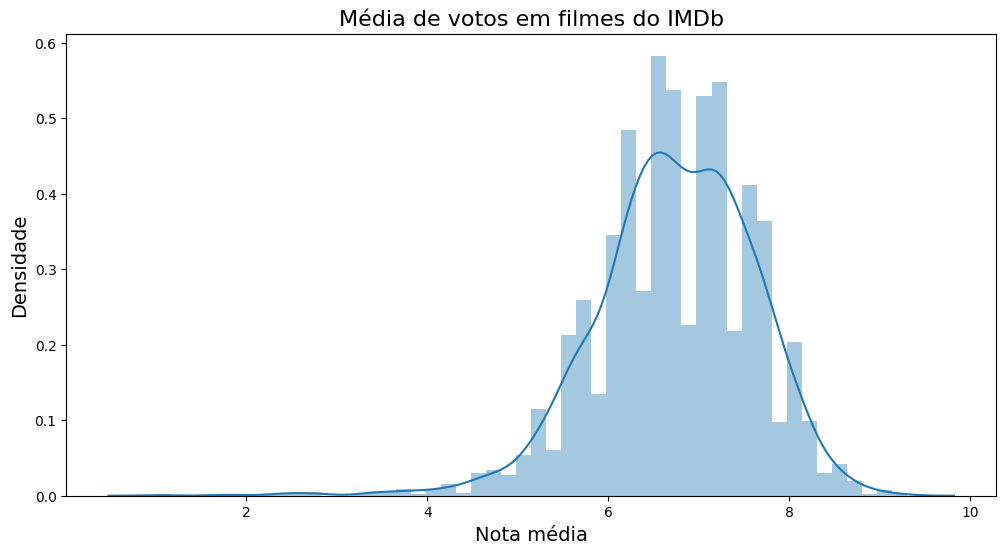

In [ ]:
ax = sns.distplot(dados.averageRating)
ax.figure.set_size_inches(12, 6)
ax.set_title('Média de votos em filmes do IMDb', fontsize=16)
ax.set_xlabel('Nota média', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

<Axes: title={'center': 'Média de votos em filmes do IMDb'}, xlabel='Nota média', ylabel='Frequência'>

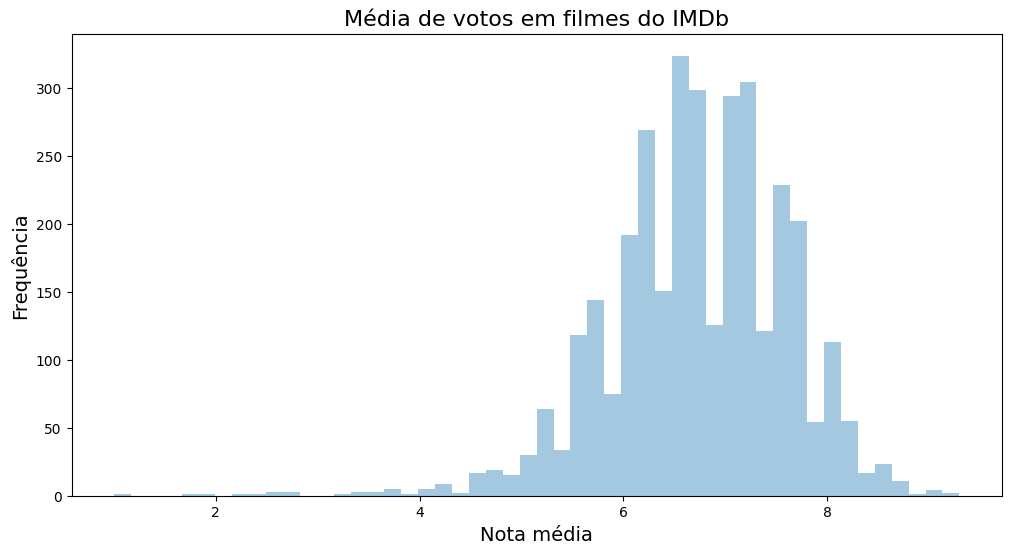

In [ ]:
ax = sns.distplot(dados.averageRating, norm_hist=False, kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Média de votos em filmes do IMDb', fontsize=16)
ax.set_xlabel('Nota média', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

## Analisando possíveis médias estranhas

Visualmente pelo histograma parece não existir, por exemplo, médias 0 ou 10, que são médias consideradas estranhas já que não é normal filmes com média de nota como essas. Vamos ver no boxplot.

<Axes: title={'center': 'Distribuição da nota média dos filmes do IMDb'}, xlabel='Nota média'>

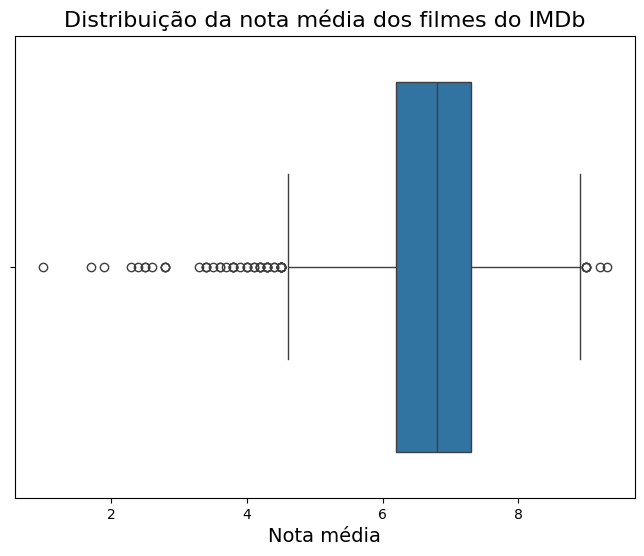

In [ ]:
ax = sns.boxplot(dados.averageRating, orient='h')
ax.figure.set_size_inches(8, 6)
ax.set_title('Distribuição da nota média dos filmes do IMDb', fontsize=16)
ax.set_xlabel('Nota média', fontsize=14)
ax

Aparentemente não vou encontrar filmes com média 0 ou 10, porém para ter certeza vou fazer uma última análise.

In [ ]:
dados.query('averageRating == 0')

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors


In [ ]:
dados.query('averageRating == 10')

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors


Agora após as as análises, pode-se constar com exatidão que não existem filmes com média de votos 0 ou 10, ou seja, não há necessidade de se fazer a limpesa desses dados.

Vamos ver os filmes com nota média de 7.3 que é a nota do nosso 3º quartil e usar um dos filmes como exempo.

In [ ]:
dados.query('averageRating == 7.3')

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
50,74156,Assault on Precinct 13,Assault on Precinct 13,0,91,"Action,Crime,Thriller",7.3,54149,150000,NaN,"October 8, 1976",John Carpenter
52,74486,Eraserhead,Eraserhead,0,89,"Fantasy,Horror",7.3,124232,10000,23557.0,"March 19, 1977",David Lynch
87,79817,Rocky II,Rocky II,0,119,"Drama,Sport",7.3,226370,7000000,85187855.0,"June 14, 1979",Sylvester Stallone
99,80801,The Gods Must Be Crazy,The Gods Must Be Crazy,0,109,"Adventure,Comedy",7.3,58579,5000000,30031783.0,"September 10, 1980",Jamie Uys
110,82348,Excalibur,Excalibur,0,140,"Adventure,Drama,Fantasy",7.3,65668,11000000,34971136.0,"April 10, 1981",John Boorman
...,...,...,...,...,...,...,...,...,...,...,...,...
3235,6723592,Tenet,Tenet,0,150,"Action,Sci-Fi,Thriller",7.3,566725,205000000,365304105.0,"August 22, 2020",Christopher Nolan
3268,7401588,Instant Family,Instant Family,0,118,"Comedy,Drama",7.3,115592,48000000,120989656.0,"November 11, 2018",Sean Anders
3283,7784604,Hereditary,Hereditary,0,127,"Drama,Horror,Mystery",7.3,360553,10000000,82850596.0,"January 21, 2018",Ari Aster
3329,9243946,El Camino: A Breaking Bad Movie,El Camino: A Breaking Bad Movie,0,122,"Action,Crime,Drama",7.3,280414,6000000,NaN,"October 7, 2019",Vince Gilligan


# Análise do Acumulado

Para podermos analisar o acumulado para vermos mais informações. Vou usar o filme <b>Rocky 2</b> como exemplo já que sua nota é de 7.3 que é a nota do 3º quartil como visto no boxplot, e por ser um filme bastante conhecido pelo público.

Ok! Agora se sabe que temos o filme Rocky 2 como exemplo, sabemos que sua nota média é de 7.3, mas o quão boa é essa nota? O que ela diz a respeto desse filme em particular? Esse é um bom filme? O quão bom ele é?

Ao análisar o acumulado nota-se que o filme Rocky 2 com sua nota média chega bem próximo dos 80% dos filmes do conjunto, e além disso se compararmos por exemplo com filmes de nota igual ou menor que 6, vemos o quão distante o filme Rocky 2 está dos demais, já que os filmes de nota 6 ou menor estão apenas um pouco acima dos 20% dos filmes.

<Axes: title={'center': 'Média de votos em filmes do IMDb'}, xlabel='Nota média', ylabel='Acumulado (%)'>

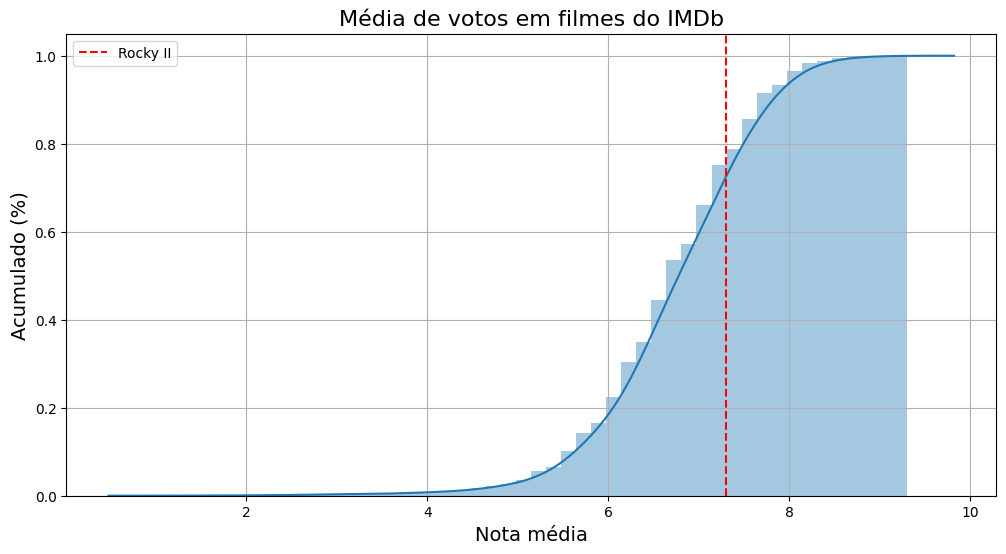

In [ ]:
ax = sns.distplot(dados.averageRating,
                  hist_kws={'cumulative': True},
                  kde_kws={'cumulative': True})
ax.figure.set_size_inches(12, 6)
ax.set_title('Média de votos em filmes do IMDb', fontsize=16)
ax.set_xlabel('Nota média', fontsize=14)
ax.set_ylabel('Acumulado (%)', fontsize=14)
ax.grid(True)
nota_marcador = 7.3
ax.axvline(nota_marcador, color='r', linestyle='--', label='Rocky II')
ax.legend()
ax

# Analizando a distribuição de dados capturados de outros campos do IMDb

## Número de votos

Ttemos um histograma que, visualmente, lembra uma distribuição com uma queda exponencial - um comportamento bem diferente dos histogramas gerados anteriormente.

Parece fazer sentido, pois quanto mais popular um filme, maior a quantidade de votos que ele receberá, e o número de filmes populares certamente é pequeno. No gráfico, isso se traduz no fato de que temos bem mais filmes com menos de 50.000 votos do que, por exemplo, filmes com mais de 1.000.000 de votos.

<Axes: title={'center': 'Número de votos em filmes do IMDb'}, xlabel='Número de votos', ylabel='Densidade'>

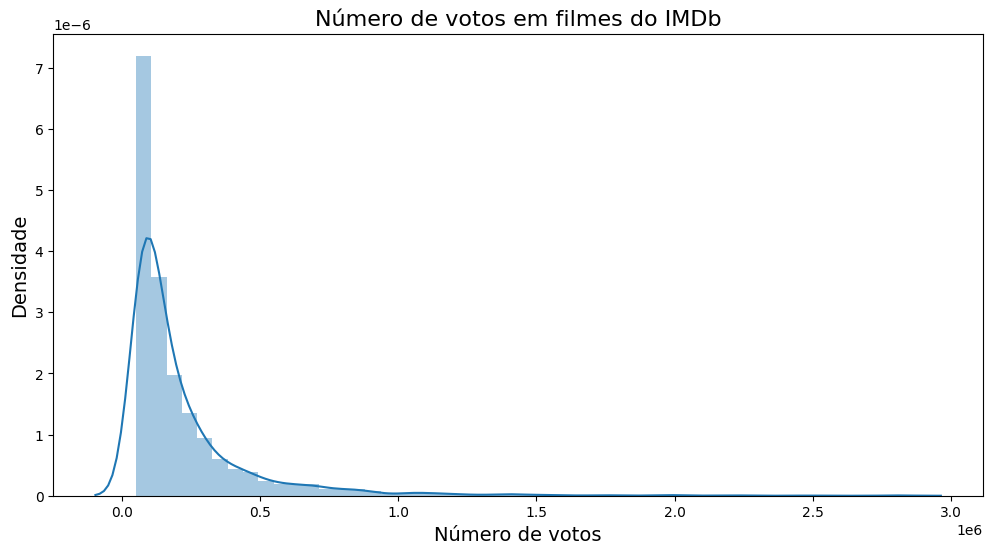

In [ ]:
ax = sns.distplot(dados.numVotes)
ax.figure.set_size_inches(12, 6)
ax.set_title('Número de votos em filmes do IMDb', fontsize=16)
ax.set_xlabel('Número de votos', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

## Budget (Gastos)
Novamente, geramos uma distribuição que cai vertiginosamente. No eixo x, perceba que os valores 1, 2, 3 e 4 são, na verdade, multiplicados por 1e8 - ou seja, por 100000000.

<Axes: title={'center': 'Gastos em filmes do IMDb'}, xlabel='Gastos', ylabel='Densidade'>

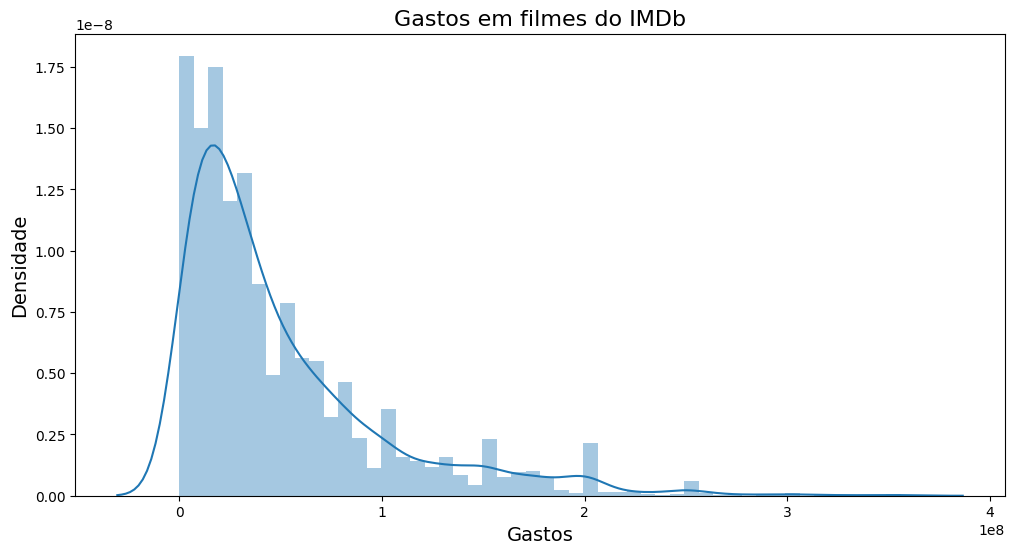

In [ ]:
ax = sns.distplot(dados.budget)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gastos em filmes do IMDb', fontsize=16)
ax.set_xlabel('Gastos', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

## Gross (Lucro)

A distribuição aqui para a coluna "Gross" cai também de forma vertiginosa, e até mais radical do que sua antecessora, embora aqui, diferente da coluna "Budget", os valores 1, 2, 3 e 4 são, na verdade, multiplicados por 1e9 - ou seja, por 1000000000.

<Axes: title={'center': 'Lucro em filmes do IMDb'}, xlabel='Lucro', ylabel='Densidade'>

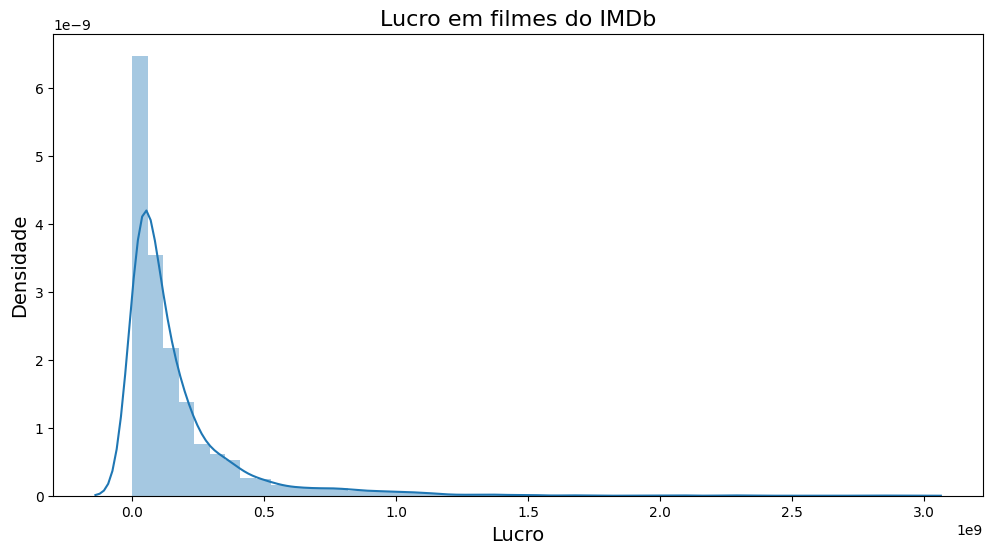

In [ ]:
ax = sns.distplot(dados.gross)
ax.figure.set_size_inches(12, 6)
ax.set_title('Lucro em filmes do IMDb', fontsize=16)
ax.set_xlabel('Lucro', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

Ao analisar a distribuição de Gastos vs Lucro como a curva cai de forma mais radical em "Gross", embbora a escala de valores seja maior aqui, me veio um questionamento. Será que nos dados existem filmes que gastaram mais do que arrecadaram? Veremos em seguida.

Na busca por filmes gastaram mais do que arrecadaram cheguei a um valor: 495 filmes. Mas só esse número não me diz muito. talvez seja melhor saber a porcentagem de filmes dentro da base de dados que atendendem a esse critério.

In [ ]:
dados.query('budget > gross').count()[0]

495

Agora chegando a um valor percentual de 14.78% podemos ter uma ideia de que é um valor até considerável, sendo esse quase 15% dos filmes presentes na nossa base de dados.

In [ ]:
total_filmes = dados.shape[0]

filmes_com_budget_maior_que_gross = dados.query('budget > gross')
num_filmes_budget_maior_que_gross = filmes_com_budget_maior_que_gross.shape[0]

porcentagem_filmes_budget_maior_que_gross = (num_filmes_budget_maior_que_gross / total_filmes) * 100

print(f"A porcentagem de filmes onde o valor gasto é maior que o lucro é: {porcentagem_filmes_budget_maior_que_gross:.2f}%")

A porcentagem de filmes onde o valor gasto é maior que o lucro é: 14.78%


Vamos ver isso em Gráfico para ter uma noção mais visual...

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Porcentagem de filmes onde o gasto é maior que o lucro')

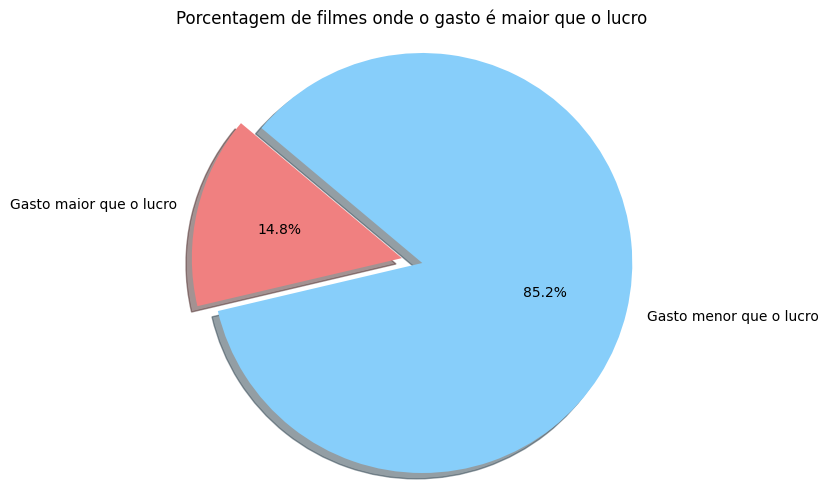

In [ ]:
filmes_com_budget_maior_que_gross = dados.query('budget > gross')
num_filmes_budget_maior_que_gross = filmes_com_budget_maior_que_gross.shape[0]

total_filmes = dados.shape[0]

porcentagem_filmes_budget_maior_que_gross = (num_filmes_budget_maior_que_gross / total_filmes) * 100
porcentagem_filmes_budget_menor_ou_igual_a_gross = 100 - porcentagem_filmes_budget_maior_que_gross

labels = ['Gasto maior que o lucro', 'Gasto menor que o lucro']
sizes = [porcentagem_filmes_budget_maior_que_gross, porcentagem_filmes_budget_menor_ou_igual_a_gross]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentagem de filmes onde o gasto é maior que o lucro')

# Tempo de duração dos filmes

Aqui pode-se notar que a maioria dos filmes tem (visualmente falando) uma duração mais ou menos entre 110 e 115 minutos, e sua corva lembra a de uma distribuição normal.

<Axes: title={'center': 'Tempo de duração dos filmes do IMDb'}, xlabel='duração', ylabel='Densidade'>

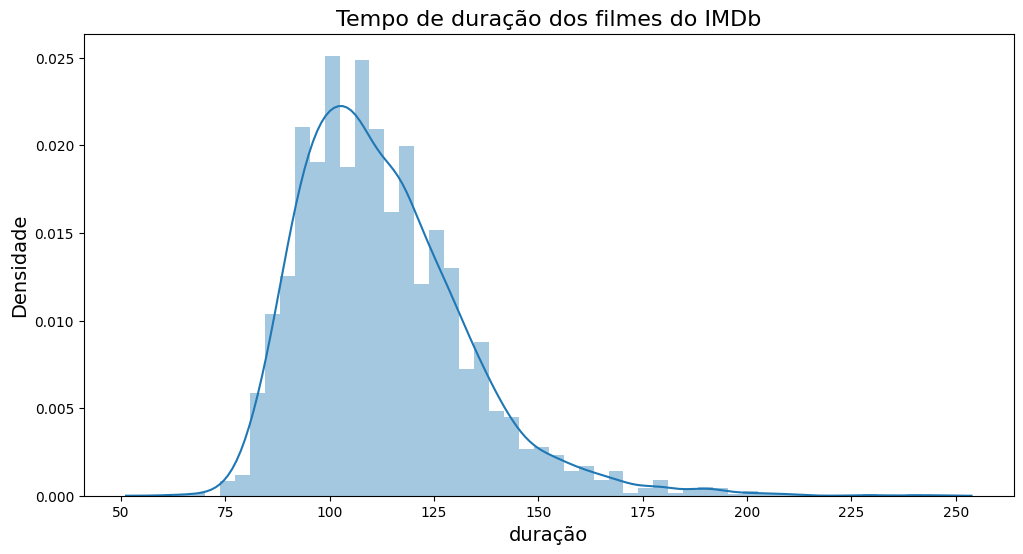

In [ ]:
ax = sns.distplot(dados.runtimeMinutes)
ax.figure.set_size_inches(12, 6)
ax.set_title('Tempo de duração dos filmes do IMDb', fontsize=16)
ax.set_xlabel('duração', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

### Vamos dar uma olhada também no acumulado

Olhando o acumulado, é possível inferirmos visualmente, por exemplo, que pouco mais de 20% dos filmes no conjunto de dados do IMDb têm menos de 100 minutos de duração.

<Axes: title={'center': 'Tempo de duração dos filmes do IMDb'}, xlabel='duração (acumulado %)', ylabel='Densidade'>

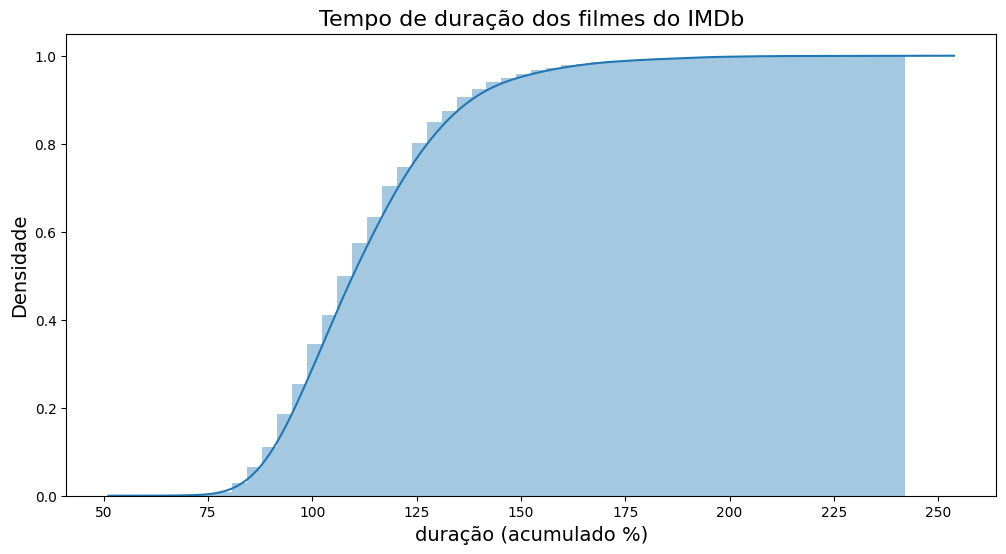

In [ ]:
ax = sns.distplot(dados.runtimeMinutes,
                  hist_kws={'cumulative': True},
                  kde_kws={'cumulative': True})
ax.figure.set_size_inches(12, 6)
ax.set_title('Tempo de duração dos filmes do IMDb', fontsize=16)
ax.set_xlabel('duração (acumulado %)', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

Existe também uma maneira de verificarmos informações de forma numérica. Vamos supor que queremos saber, por exemplo, qual é o valor que separa 80% desse conjunto. Para isso, será usada a função quantile(), que aceita um parâmetro q com o número decimal referente à porcentagem desejada - nesse caso, 0.8.

## Tempo de duração dos top 20%

Assim, sabemos que 80% dos nossos filmes têm 127 minutos ou menos, e que 20% têm uma duração maior.

In [ ]:
dados.runtimeMinutes.quantile(0.8)

127.0

# Analisando o efeito de acordo com o tamanho de determinada amostra

Aqui a ideia é ver o comportamento da média geral a medida que novos dados vão sendo inseridos.

Criando um laço para entender como a média varia a medida em que são acrescentados novos dados.

In [ ]:
medias_imdb = dados.averageRating
medias_imdb

0       6.4
1       7.1
2       7.6
3       7.4
4       7.9
       ... 
3343    7.3
3344    6.6
3345    7.4
3346    5.7
3347    6.4
Name: averageRating, Length: 3348, dtype: float64

Criando uma lista e preenchendo com os nossos dados.

In [ ]:
medias = [medias_imdb[0:i].mean() for i in range(1, len(medias_imdb))]

Aqui podemos ver a média numa ascendente abrupta, muito provavelmente pela média alta dos primeiros dados, porém a medida que novos dados vão sendo acrescentados a média começa a cair rápido, mas vai se estabilizando em uma descida bem mais suave até se estabilizar.

Text(0, 0.5, 'Média das notas')

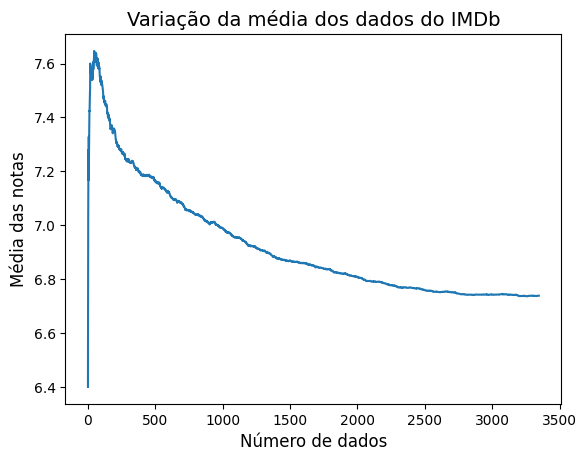

In [ ]:
plt.plot(medias)
plt.title('Variação da média dos dados do IMDb', fontsize=14)
plt.xlabel('Número de dados', fontsize=12)
plt.ylabel('Média das notas', fontsize=12)

Fazendo mais uma vez, mas dessa vez embaralhando os dados para ver se a ordem em que os dados estão distribuidos faz diferença na visualização.

In [ ]:
import numpy as np

In [ ]:
temp = medias_imdb.sample(frac=1)
np.random.seed(75243)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

Neste caso porém, como os dados foram embaralhados, a medida que temos poucos dados vemos a média subir e descer abruptamente, porém a medida que mais dados são adicionados a média se estabiliza.

Text(0, 0.5, 'Média das notas')

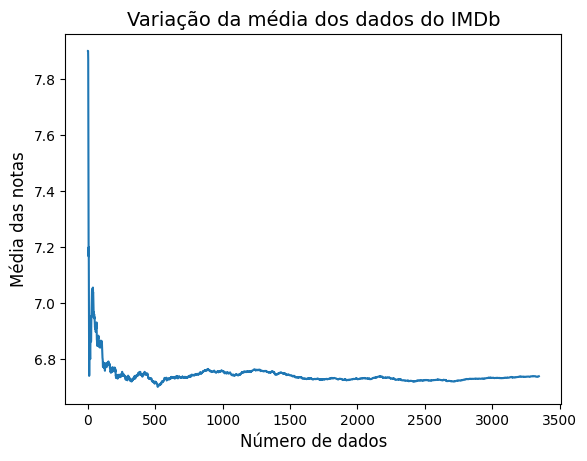

In [ ]:
plt.plot(medias)
plt.title('Variação da média dos dados do IMDb', fontsize=14)
plt.xlabel('Número de dados', fontsize=12)
plt.ylabel('Média das notas', fontsize=12)

# Aplicando o z test para o intervalo de confiança

Um Z-Test é um teste de estatística utilizado para determinar se duas médias populacionais são diferentes quando o tamanho da amostra é grande e as variantes conhecidas.


In [ ]:
from statsmodels.stats.weightstats import zconfint

In [ ]:
intervalo = zconfint(dados.averageRating)
print(f'O intervalo de confiança para a média dos filmes do IMDb é de {intervalo[0]} a {intervalo[1]}.')

O intervalo de confiança para a média dos filmes do IMDb é de 6.708647261217805 a 6.768413670681835.


# Analizando os dados do MovieLens

In [ ]:
dados_notas = pd.read_csv('ratings.csv')
dados_filmes = pd.read_csv('movies.csv')

In [ ]:
dados_filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
dados_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
nota_media_por_filme = dados_notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Encontramos alguns filmes com média 5, e isso é estranho. Devem existir filmes com poucos votos. Vamos ver!

<Axes: title={'center': 'Distribuição das notas médias dos filmes no MovieLens'}, xlabel='Notas médias', ylabel='Densidade'>

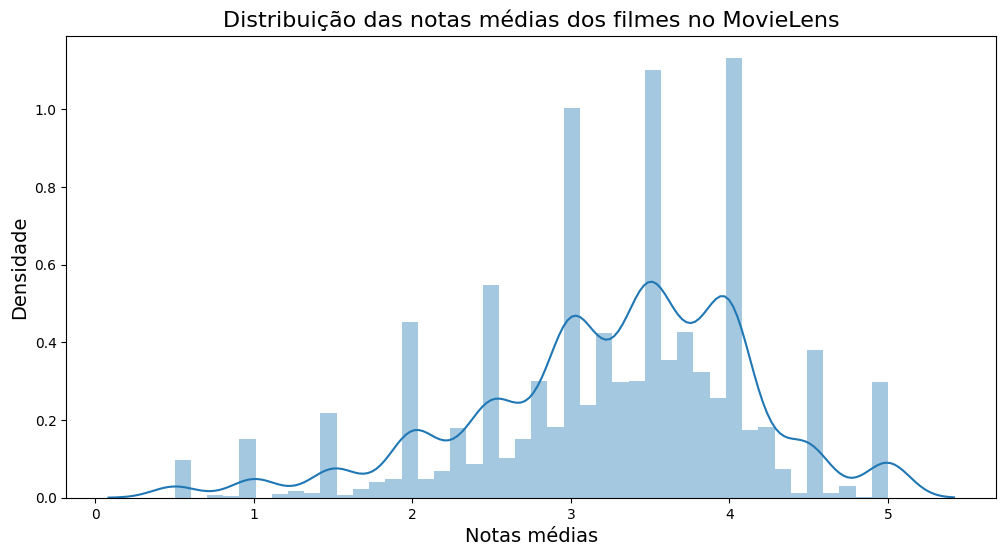

In [ ]:
ax = sns.distplot(nota_media_por_filme)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das notas médias dos filmes no MovieLens', fontsize=16)
ax.set_xlabel('Notas médias', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

Solicitando apenas os filmes que tiveram 10 ou mais votos.

In [ ]:
quantidade_de_votos_por_filme = dados_notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

Obtendo apenas os valores referentes aos que estão presentes na variável "filmes_com_pelo_menos_10_votos.values".

In [ ]:
media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

In [ ]:
print(f'Média dos filmes com pelo menos 10 votos: {media_dos_filmes_com_pelo_menos_10_votos.mean()}')

Média dos filmes com pelo menos 10 votos: 3.4320503405352594


Plotando novamente o histograma:

Vemos que agora a temos uma distribuição dos dados que se assemelha bem  mais a uma distribuição normal.

<Axes: title={'center': 'Distribuição das notas médias dos filmes no MovieLens com 10 ou mais votos'}, xlabel='Notas médias', ylabel='Densidade'>

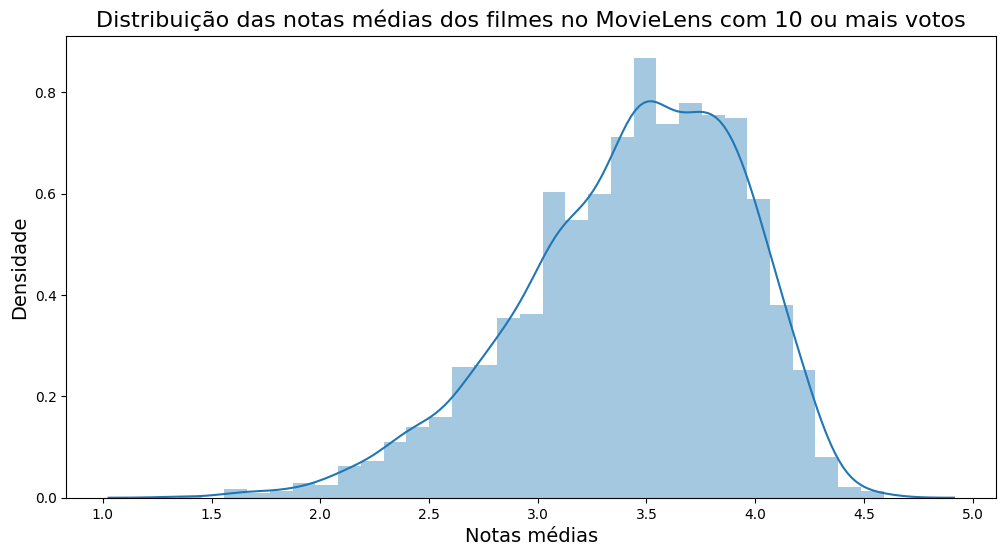

In [ ]:
ax = sns.distplot(media_dos_filmes_com_pelo_menos_10_votos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das notas médias dos filmes no MovieLens com 10 ou mais votos', fontsize=16)
ax.set_xlabel('Notas médias', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

Aqui tanto pelo histogramaquanto pelo boxplot pudemos ver que a mediana, por exemplo é de 3.5

<Axes: title={'center': 'Distribuição das notas médias dos filmes no MovieLens'}, xlabel='Notas'>

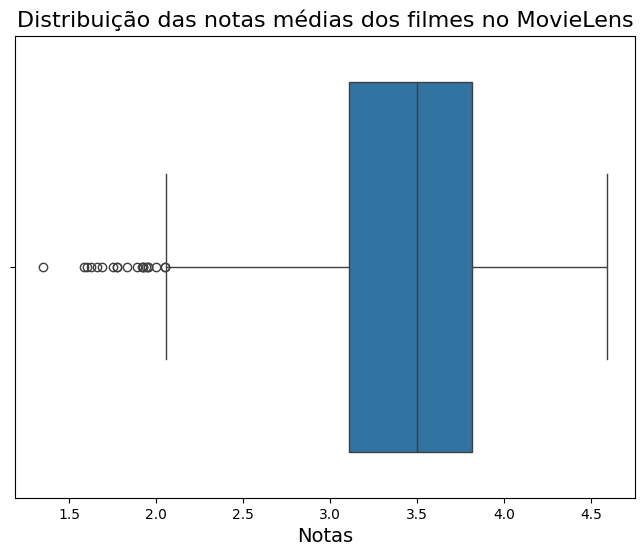

In [ ]:
ax = sns.boxplot(media_dos_filmes_com_pelo_menos_10_votos, orient='h')
ax.figure.set_size_inches(8, 6)
ax.set_title('Distribuição das notas médias dos filmes no MovieLens', fontsize=16)
ax.set_xlabel('Notas', fontsize=14)
ax

## Obtendo o intervalo de confiança para a média dos filmes do Movielens

In [ ]:
zconfint(media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

## Notas do filme Rocky 2 no Movielens

Vamos agora observar o comportamento das notas do filme Rocky II na base de dados do MovieLens.

A ideia aqui é comparar não só com a média do próprio MovieLens como também do IMDb para termos uma base do quanto o filme Rocky II é bom, ou se é mesmo bom.

### Procurando o movieId do filme Rocky 2

In [ ]:
dados_filmes[dados_filmes['title'].str.contains('Rocky', case=False)]

,movieId,title,genres
1431,1954,Rocky (1976),Drama
1809,2409,Rocky II (1979),Action|Drama
1810,2410,Rocky III (1982),Action|Drama
1811,2411,Rocky IV (1985),Action|Drama
1812,2412,Rocky V (1990),Action|Drama
1997,2657,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi
2809,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
6361,49651,Rocky Balboa (2006),Action|Drama
9410,165343,The Rocky Horror Picture Show: Let's Do the Ti...,Comedy|Horror|Sci-Fi|Thriller


In [ ]:
notas_rocky = dados_notas.query('movieId == 2409')
notas_rocky.head()

,userId,movieId,rating,timestamp
1926,18,2409,4.0,1455749696
10753,68,2409,3.0,1269122216
15708,103,2409,4.0,1431969127
20515,135,2409,5.0,1009694080
23500,160,2409,3.0,976796213


A visualização do histograma para esse caso não parece ser a melhor possível, mas é curioso notar que houve um usuário que deu uma nota 0.5, o que é bem peculiar. Vamos ver melhor no boxplot.

<Axes: title={'center': 'Distrivuição das notas do filme Rock II no MovieLens'}, xlabel='Notas', ylabel='Densidade'>

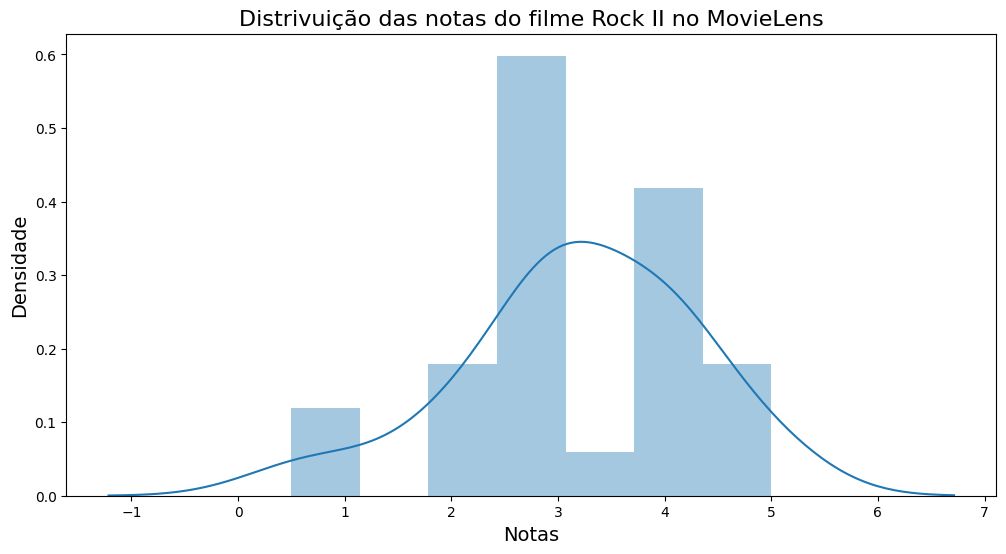

In [ ]:
ax = sns.distplot(notas_rocky.rating)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrivuição das notas do filme Rock II no MovieLens', fontsize=16)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

Aparentemente o boxplot também não nos ajuda muito... perceba que nem é possível ver onde se encontra a mediana exatamente. Vamos tentar ver onde ela se encontra com o método describe().

<Axes: title={'center': 'Distribuição das notas do filme Rocky II no MovieLens'}, xlabel='Notas'>

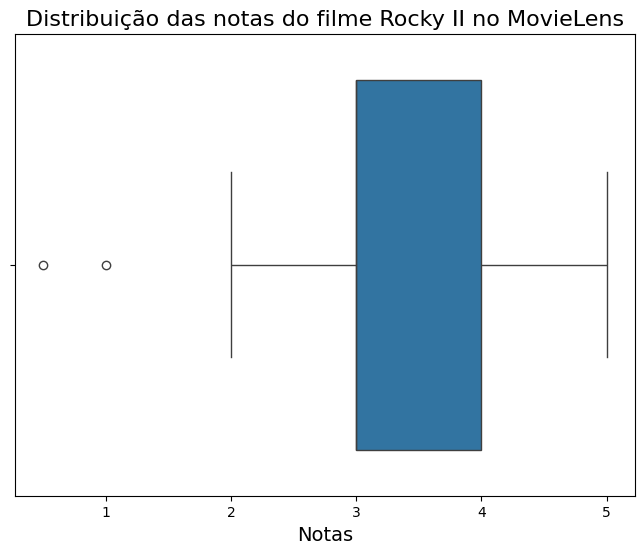

In [ ]:
ax = sns.boxplot(notas_rocky.rating, orient='h')
ax.figure.set_size_inches(8, 6)
ax.set_title('Distribuição das notas do filme Rocky II no MovieLens', fontsize=16)
ax.set_xlabel('Notas', fontsize=14)
ax

Agora sim pode-se ver que a <b>média do filme Rocky é 3.19, que é menor que a média geral dos filmes do MovieLens, que como vimos é de 3.5, além de muito diferente da nota média do IMDb que é 7.3, sendo a média geral do IMDb de 6.73</b>. Isso mostra que diferentemente dos dados que temos no IMDb, aqui no MovieLens pelo que os dados nos mostram, os usuários tem uma tendência de achar o filme Rocky II muito mais um filme mediano do que um bom filme. Vale ressaltar que no MovieLens temos uma distribuição bem diferente, é claro são formatos diferentes, por exemplo aqui as notas são dadas de 0 a 5, já no IMDb são de 0 a 10.

In [ ]:
notas_rocky.rating.mean()

3.1923076923076925

### Outro fator que pode gerar uma mudança na distribuição dos dados é o número de amostras.

In [ ]:
notas_rocky.rating.count()

26

## Obtendo o intervalo de confiança para o filme Rocky II do MovieLens

Como temos poucas amostras para o filme Rocky II o mais confiável é usarmos o t test.

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

Pelo intervalo de confiança com alpha 5% pode se coniderar que no mundo real o intervalo da nota do filme Rocky II está entre (2.74 e 3.63), ou seja está dentro de um intervalo maior que o intervalo de confiança para a média geral que é de (3.41 e 3.45).

In [ ]:
descr_rocky_2 = DescrStatsW(notas_rocky.rating)
descr_rocky_2.tconfint_mean()

(2.74956429765692, 3.635051086958465)

# Comparando duas amostras usando o ttest_ind

Repare que o p value é <b>maior do que 0.05</b>. Portanto, estatisticamente, não existe uma diferença significante entre os dois conjuntos de amostras.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(notas_rocky.rating, dados_notas.rating)

TtestResult(statistic=-1.5123262178779477, pvalue=0.13045402762894376, df=100860.0)

# Comparando duas amostras utilizando o DescrStatsW do statsmodels

Obteve-se um p value igual a 1.512, o que siginfica que NÃO podemos descartar a hipótese de que os conjuntos são iguais. Além disso, temos o intervalo de confiança, que é de -0.092 até 0.710.

## Z Test

In [ ]:
descr_todas_as_notas = DescrStatsW(dados_notas.rating)
descr_rocky_2 = DescrStatsW(notas_rocky.rating)
comparacao = descr_todas_as_notas.get_compare(descr_rocky_2)

print(comparacao.summary(use_t=False))

                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.3092      0.204      1.512      0.130      -0.092       0.710


## T test

In [ ]:
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.3092      0.204      1.512      0.130      -0.092       0.710


# Visualizando de forma Gráfica

Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

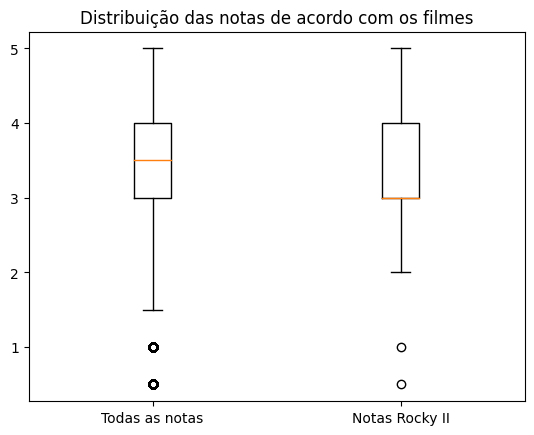

In [ ]:
plt.boxplot([dados_notas.rating, notas_rocky.rating], labels=['Todas as notas', 'Notas Rocky II'])
plt.title('Distribuição das notas de acordo com os filmes')

# Comparando a Média dos três primeiros filmes da franquia Rocky

In [ ]:
dados_filmes.query('movieId in [1954, 2409, 2410]')

,movieId,title,genres
1431,1954,Rocky (1976),Drama
1809,2409,Rocky II (1979),Action|Drama
1810,2410,Rocky III (1982),Action|Drama


No boxplot gerado já é possível observar que tanto Rockie II quanto Rockie III tem a mediana igual a 3, já o primeiro filme ossui uma mediana superior, que é igual a 4.

<Axes: title={'center': 'Distribuição das notas dos três primeiros filmes da franquia Rockie'}, xlabel='Id dos filmes', ylabel='Notas'>

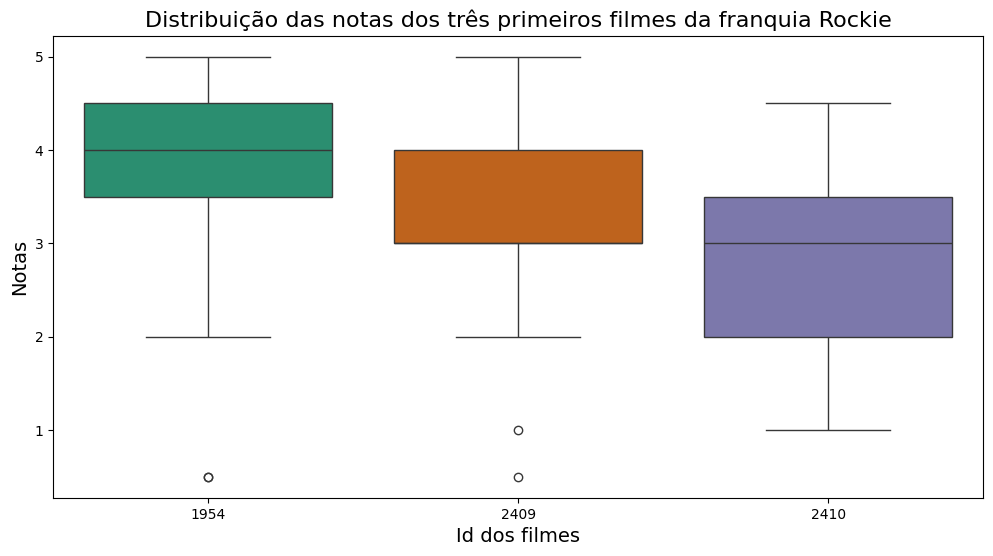

In [ ]:
ax = sns.boxplot(x='movieId', y='rating', data=dados_notas.query('movieId in (1954, 2409, 2410)'), palette='Dark2')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição das notas dos três primeiros filmes da franquia Rockie', fontsize=16)
ax.set_xlabel('Id dos filmes', fontsize=14)
ax.set_ylabel('Notas', fontsize=14)
ax

## Analisando a quantidade de notas que cada um dos 3 filmes possui

In [ ]:
dados_notas.query('movieId in (1954, 2409, 2410)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1954,64,64,64
2409,26,26,26
2410,24,24,24


# Agora vamos aos testes

Agora vamos realizar nossos testes estatísticos. A ideia é estipularmos qual desses filmes é melhor, não só nos nossos conjuntos de dados, mas também extrapolando para todas as pessoas que viram esses filmes na vida real. Para isso, usaremos o DescrStatsW(). Começaremos comparando <b>Rocke e Rockie II</b>.

In [ ]:
notas_id_1954 = dados_notas.query('movieId == 1954')
notas_id_2409 = dados_notas.query('movieId == 2409')
notas_id_2410 = dados_notas.query('movieId == 2410')

Resultado:

De acordo com nossos resultados, existe uma diferença estatisticamente válida entre esses conjuntos.

Aplicando o Teste T com alpha = 0.05, encontramos uma diferença estatística entre os filmes Rocky e Rocky II, com um p value igual a 0.010 e um intervalo de confiança entre 0.155 e 1.116.

In [ ]:
descr_id_1954 = DescrStatsW(notas_id_1954.rating)
descr_id_2409 = DescrStatsW(notas_id_2409.rating)
comparacao = descr_id_1954.get_compare(descr_id_2409)

print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.6358      0.242      2.629      0.010       0.155       1.116


Vamos aplicar o mesmo teste para os <b>Rocky II e Rocky III</b>

Resultado:
Dessa vez, nosso p value não indica uma diferença significante (pois não é menor do que 0.05), e o intervalo inclui tanto a chance do filme ser pior, quanto a chance dele ser melhor.

In [ ]:
descr_id_2410 = DescrStatsW(notas_id_2410.rating)
descr_id_2409 = DescrStatsW(notas_id_2409.rating)
comparacao = descr_id_2410.get_compare(descr_id_2409)

print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4631      0.293     -1.579      0.121      -1.053       0.127


Comparando os filmes <b>Rocky e Rocky III</b>:

Desta vez encontramos sim uma diferença sigificativa, com um p value de 0.0 e um intervalo de confiança entre 0.621 e 1.576.
Portanto não foi encontrado diferença significante apenas entre Rocky II  e Rocky III, talvez sendo Rocky III o pior dentre eles.

In [ ]:
comparacao = descr_id_1954.get_compare(descr_id_2410)
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      1.0990      0.240      4.575      0.000       0.621       1.576


# Verificando a Normalilidade dos dados

Ao verificar se os dados referentes aos 3 filmes que foram separados, foi percebido que o p value do filme Rocky (id 1954) é menor que 0.05, o que significa que tanto o z test quanto o t test não podem ser aplicados, pois os dados deste filme em particular não vêm de uma distribuição normal já para os outros 2 filmes, o p value é maior que 0.05, o que já indica a normalidade desses dados.

In [ ]:
from scipy.stats import normaltest

In [ ]:
_, p = normaltest(notas_id_1954.rating)
p

3.970411671192963e-05

In [ ]:
_, p = normaltest(notas_id_2409.rating)
p

0.32236441296635443

In [ ]:
_, p = normaltest(notas_id_2410.rating)
p

0.6095456716664862

Nesse caso, o p value  <b>é significativo</b>, ou seja, descartando a hipótese nula. No ranksums(), a hipótese nula é de que as duas amostras vieram da mesma distribuição.

In [ ]:
from scipy.stats import ranksums

In [ ]:
_, p = ranksums(notas_id_1954.rating, notas_id_2409.rating)
p

0.006448721127409997